# Import libraries

In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df_orders= pd.read_csv("orders.csv")
df_cust = pd.read_csv("customers.csv")
df_line_items = pd.read_csv("line_items.csv")
df_exch = pd.read_csv("exchange_rates.csv")

### Check for nulls

In [24]:
print("Shape of df_orders: ", df_orders.shape)
print("Shape of df_cust: ", df_cust.shape)
print("Shape of df_line_items: ", df_line_items.shape)
print("Shape of df_exch: ", df_exch.shape)

Shape of df_orders:  (37, 7)
Shape of df_cust:  (20, 3)
Shape of df_line_items:  (37, 5)
Shape of df_exch:  (85, 5)


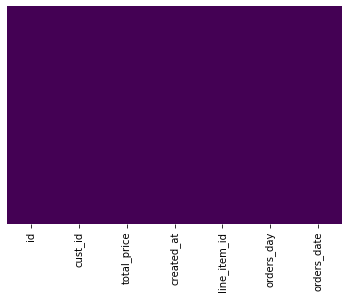

In [25]:
# Visualizing nulls using heatmap
sns.heatmap(df_orders.isnull(),yticklabels=False,cbar=False,cmap='viridis')

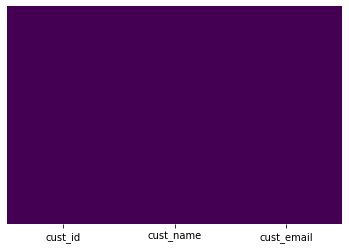

In [26]:
sns.heatmap(df_cust.isnull(),yticklabels=False,cbar=False,cmap='viridis')

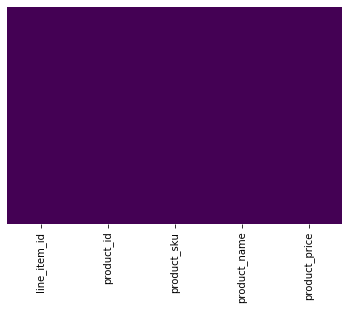

In [27]:
sns.heatmap(df_line_items.isnull(),yticklabels=False,cbar=False,cmap='viridis')

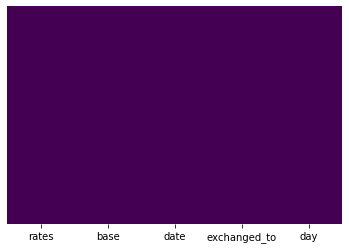

In [28]:
sns.heatmap(df_exch.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As no nulls are presen in our datasets, we need not do any null value treatment

## Exploring  Data Analysis

After checking for nulls, we would like to know what our datsets look like, what are the ranges, datatypes and unique values. WE will also try to determine if any feature engineering needs to be done.

### Exploring Customers Dataset

In [29]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str


In [30]:
details_cust = rstr(df_cust)
display(details_cust)

Data shape: (20, 3)
___________________________
Data types:
 object    2
int64     1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
cust_id,int64,20,4,0,0.0,"[[47178, 94720, 59933, 23955]]",0.264299,-1.060084
cust_name,object,20,4,0,0.0,"[[William Doe, Emile Tumson, Ethan Jones, Dani...",NaN,NaN
cust_email,object,20,4,0,0.0,"[[william.doe@gmail.com, emile.tumson@gmail.co...",NaN,NaN


### Exploring Line Items Dataset

In [31]:
details_line_items = rstr(df_line_items)
display(details_line_items)

Data shape: (37, 5)
___________________________
Data types:
 object     2
int64      2
float64    1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
line_item_id,int64,37,6,0,0.0,"[[610448, 997208, 759658, 317808, 771854, 6046...",-0.328020,-0.957215
product_id,int64,37,6,0,0.0,"[[632910392, 278266679, 573794972, 477365777, ...",-0.419670,-0.981095
product_sku,object,37,6,0,0.0,"[[PPLEPUNCH20-05, GPSTASH-01, SAGENSOUR-01, GO...",NaN,NaN
product_name,object,37,6,0,0.0,"[[Purple Punch 2.0 Dried Flower, Grandpa's Sta...",NaN,NaN
product_price,float64,37,5,0,0.0,"[[29.4, 49.99, 36.99, 5.99, 259.99]]",2.364836,4.408665


In [32]:
df_line_items['product_name'].value_counts()

Grandpa's Stash Dried Flower     9
Glueberry OG Pre-Rolls           8
Sage N Sour Dried Flower         7
Hybrid Blend THC Tincture        5
Purple Punch 2.0 Dried Flower    4
Pax 3 Vaporizer                  4
Name: product_name, dtype: int64

In [33]:
df_line_items.head(10)

,line_item_id,product_id,product_sku,product_name,product_price
0,610448,632910392,PPLEPUNCH20-05,Purple Punch 2.0 Dried Flower,29.40
1,997208,278266679,GPSTASH-01,Grandpa's Stash Dried Flower,49.99
2,997208,278266679,GPSTASH-01,Grandpa's Stash Dried Flower,49.99
3,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99
4,759658,573794972,SAGENSOUR-01,Sage N Sour Dried Flower,36.99
5,317808,477365777,GOGPR-07,Glueberry OG Pre-Rolls,5.99
6,771854,694165761,HYBTINC-03,Hybrid Blend THC Tincture,49.99
7,604665,510650809,PAX-3,Pax 3 Vaporizer,259.99
8,997208,278266679,GPSTASH-01,Grandpa's Stash Dried Flower,49.99
9,997208,278266679,GPSTASH-01,Grandpa's Stash Dried Flower,49.99


### Exploring Orders Dataset

In [34]:
details_orders = rstr(df_orders)
display(details_orders)

Data shape: (37, 7)
___________________________
Data types:
 object     3
int64      3
float64    1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
id,int64,37,20,0,0.0,"[[8369263756632563, 7262170348080494, 77220555...",-0.029627,-1.124772
cust_id,int64,37,4,0,0.0,"[[47178, 94720, 59933, 23955]]",0.282473,-0.860039
total_price,float64,37,11,0,0.0,"[[79.39, 86.98, 36.99, 55.98, 309.98, 315.97, ...",1.134941,-0.296662
created_at,object,37,20,0,0.0,"[[2020-03-07 14:31:11, 2020-03-01 09:16:30, 20...",NaN,NaN
line_item_id,int64,37,6,0,0.0,"[[610448, 997208, 759658, 317808, 771854, 6046...",-0.328020,-0.957215
orders_day,object,37,6,0,0.0,"[[Saturday, Sunday, Wednesday, Tuesday, Thursd...",NaN,NaN
orders_date,object,37,17,0,0.0,"[[2020-03-07, 2020-03-01, 2020-01-01, 2020-03-...",NaN,NaN


In [35]:
df_orders['orders_day'].value_counts()

Wednesday    12
Sunday        9
Thursday      5
Saturday      5
Tuesday       4
Friday        2
Name: orders_day, dtype: int64

The most number of orders were made on Wednesday and Sunday in that order. The least orders were made on Friday, which is interesting.